<a href="https://colab.research.google.com/github/zohurul/diabetes-prediction/blob/main/BMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Definition:


### Description of Columns:
1. **Age**: Numeric feature representing the age of the bank client.
2. **Job**: Categorical feature indicating the type of job the client has.
3. **Marital**: Categorical feature indicating the marital status of the client.
4. **Education**: Categorical feature representing the educational level of the client.
5. **Default**: Categorical feature indicating whether the client has credit in default.
6. **Housing**: Categorical feature indicating whether the client has a housing loan.
7. **Loan**: Categorical feature indicating whether the client has a personal loan.
8. **Balance**: Numeric feature representing the balance of the individual.
9. **Contact**: Categorical feature indicating the communication type used to contact the client.
10. **Month**: Categorical feature indicating the month of the last contact.
11. **Day**: Categorical feature indicating the day of the week of the last contact.
12. **Duration**: Numeric feature representing the duration of the last contact in seconds.
13. **Campaign**: Numeric feature representing the number of contacts performed during the current campaign for this client.
14. **Pdays**: Numeric feature representing the number of days since the client was last contacted from a previous campaign.
15. **Previous**: Numeric feature representing the number of contacts performed before the current campaign for this client.
16. **Poutcome**: Categorical feature representing the outcome of the previous marketing campaign.
17. **deposite (Target)**: Binary feature indicating whether the client has subscribed to a term deposit.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#### Data Loading and Exploration

In [ ]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6413,Female,16.0,0,0,No Info,26.11,4.0,155,0
10210,Male,64.0,1,0,not current,23.31,6.2,145,1
23355,Female,44.0,0,0,No Info,27.32,3.5,130,0
62955,Female,61.0,1,0,never,37.01,7.5,200,1
91045,Female,4.0,0,0,No Info,14.62,5.8,140,0


#### Missing Values

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


we see the is no missing values

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


people have loans counts

Text(0.5, 1.0, 'people have diabetes')

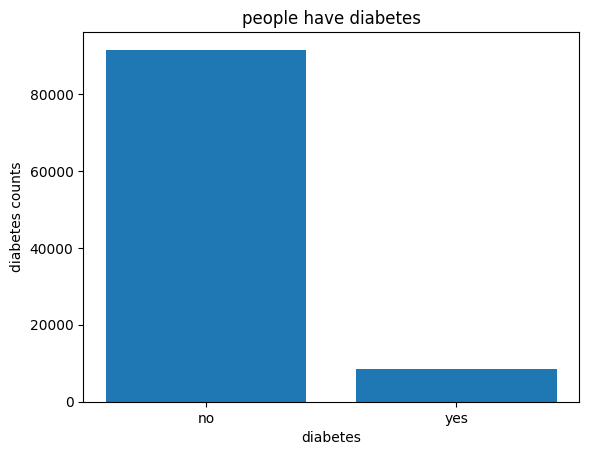

In [ ]:
counts=df["diabetes"].value_counts()
counts
plt.bar(['no','yes'] ,counts)
# set x/y labels and plot title
plt.xlabel("diabetes")
plt.ylabel("diabetes counts")
plt.title("people have diabetes")

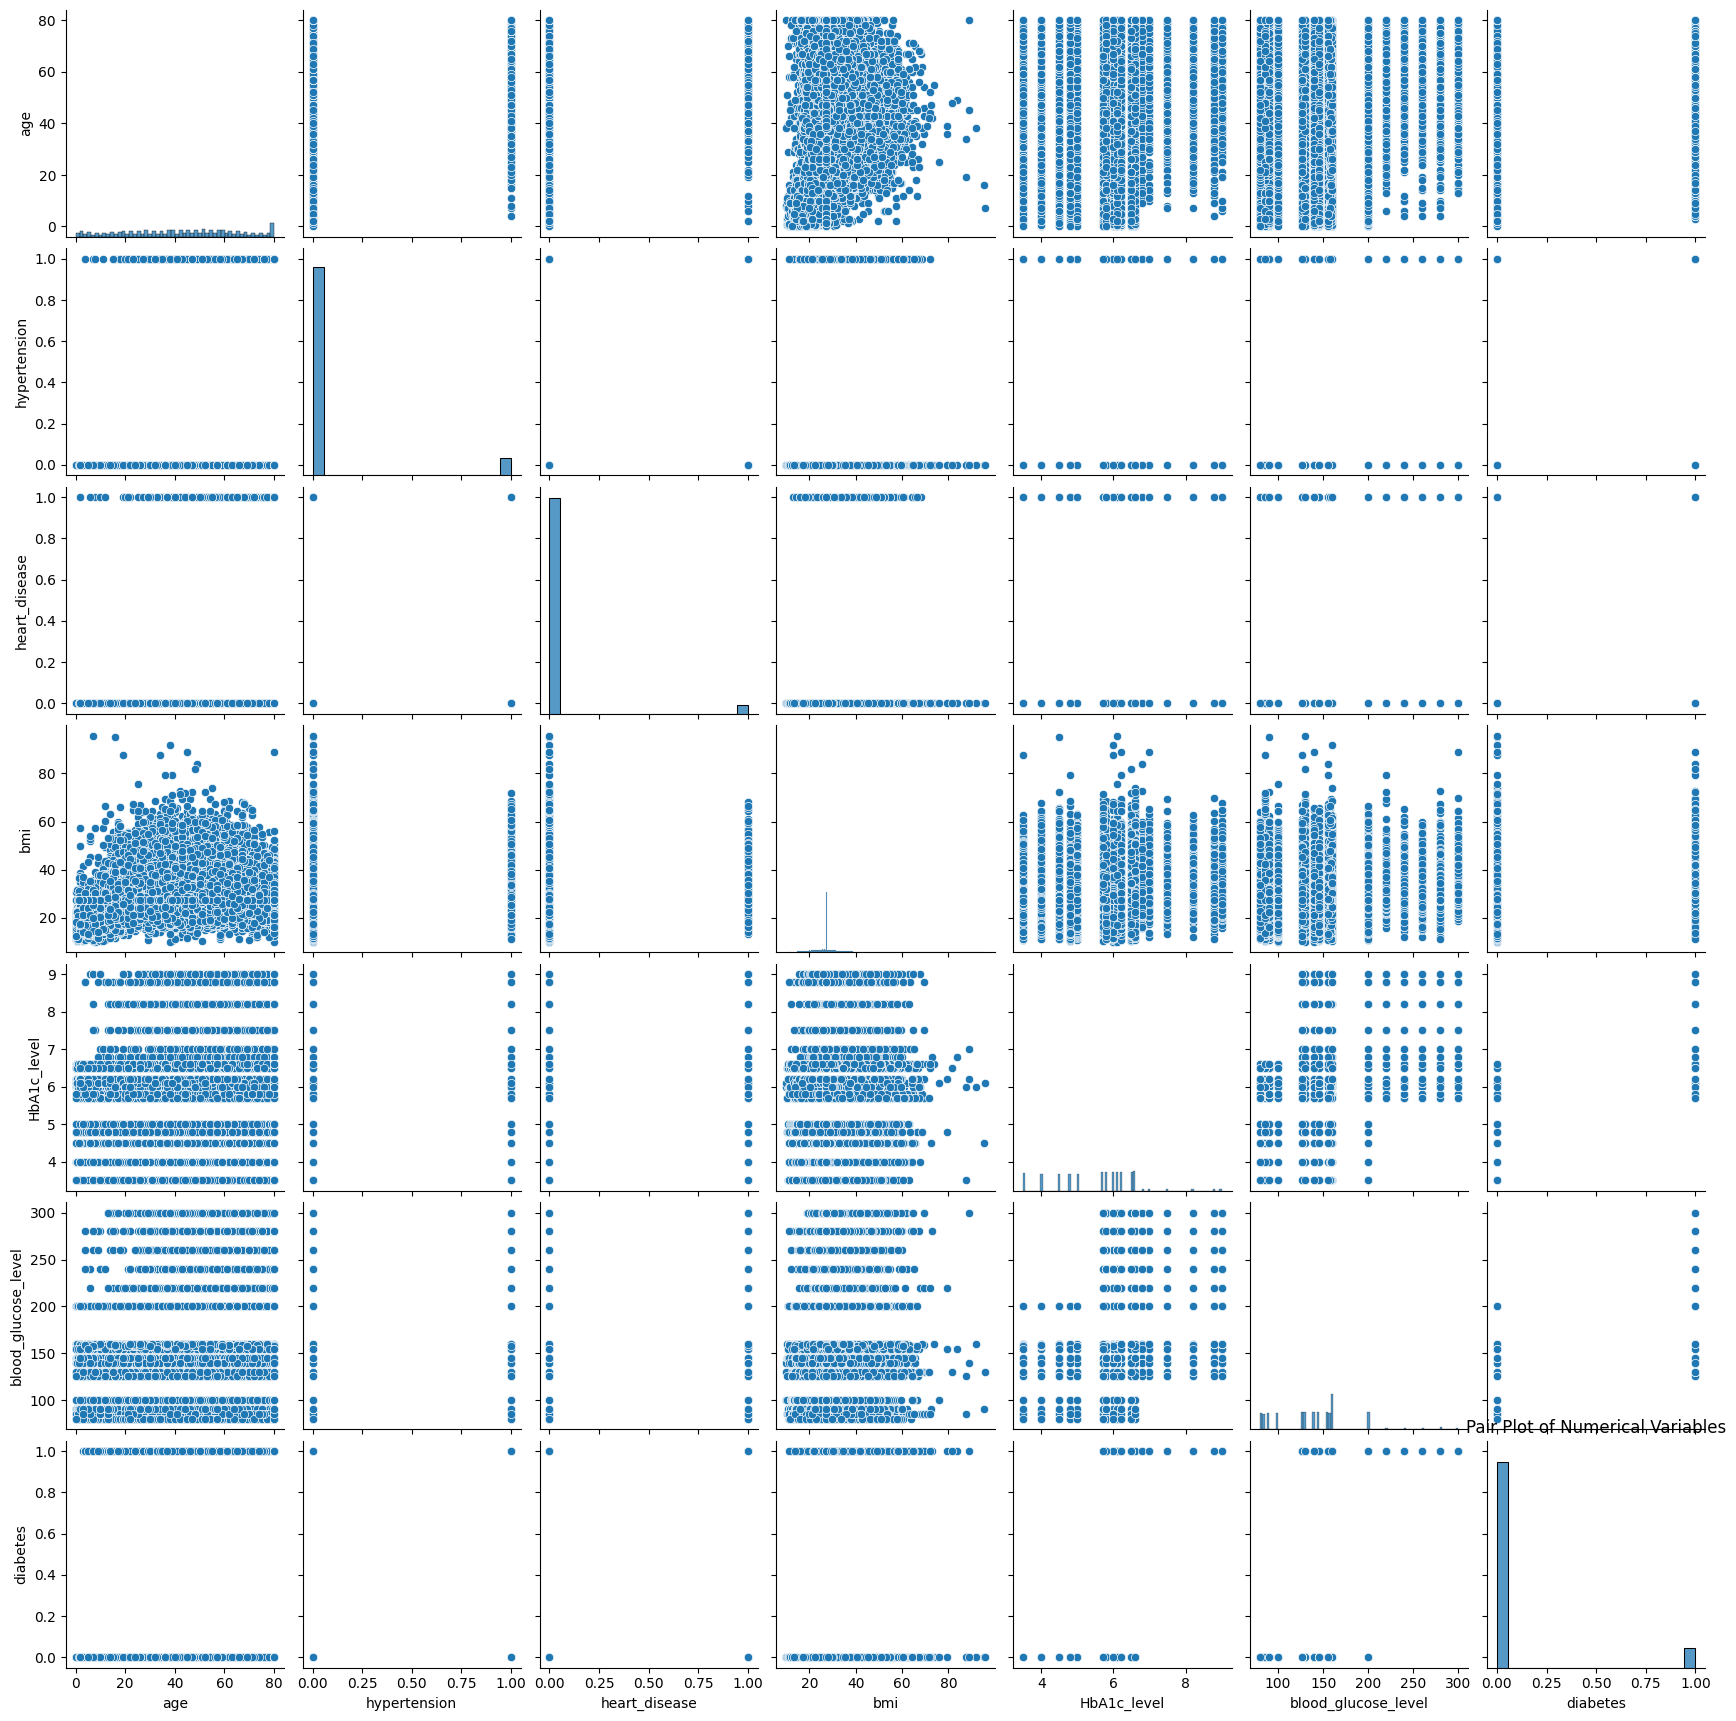

In [ ]:
sns.pairplot(df[df.select_dtypes(exclude="object").columns])
plt.title('Pair Plot of Numerical Variables')
plt.show()

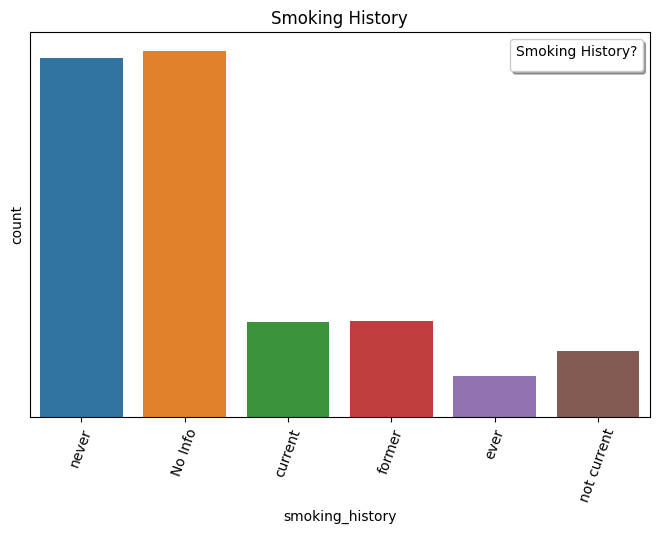

In [ ]:

plt.figure(figsize=(8, 5));
plt.title('Smoking History')
g = sns.countplot(x= 'smoking_history', hue = 'smoking_history', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Smoking History?', ncol=1, fancybox=True, shadow=True)
plt.show()

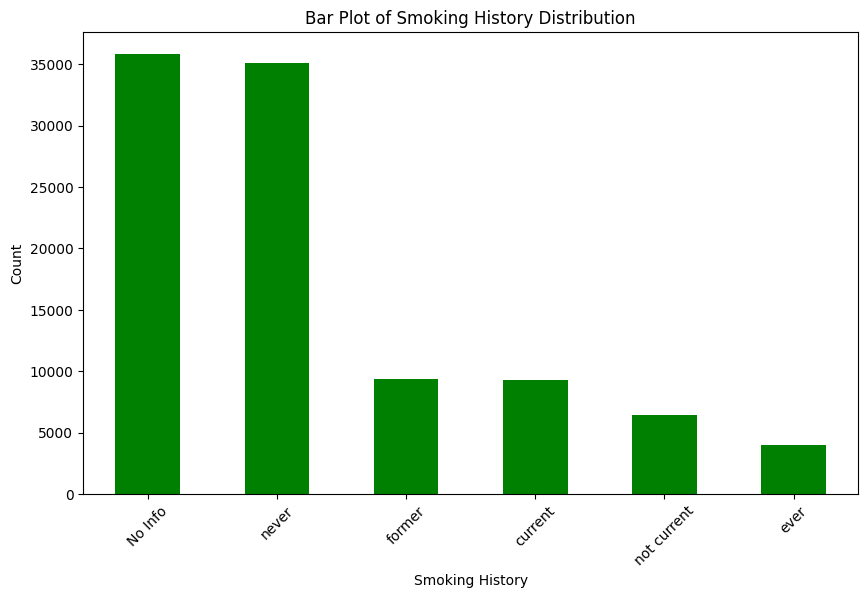

In [ ]:
plt.figure(figsize=(10, 6))
smoking_history_counts = df['smoking_history'].value_counts()
smoking_history_counts.plot(kind='bar', color='green')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Bar Plot of Smoking History Distribution')
plt.xticks(range(len(smoking_history_counts)), smoking_history_counts.index, rotation=45)
plt.show()

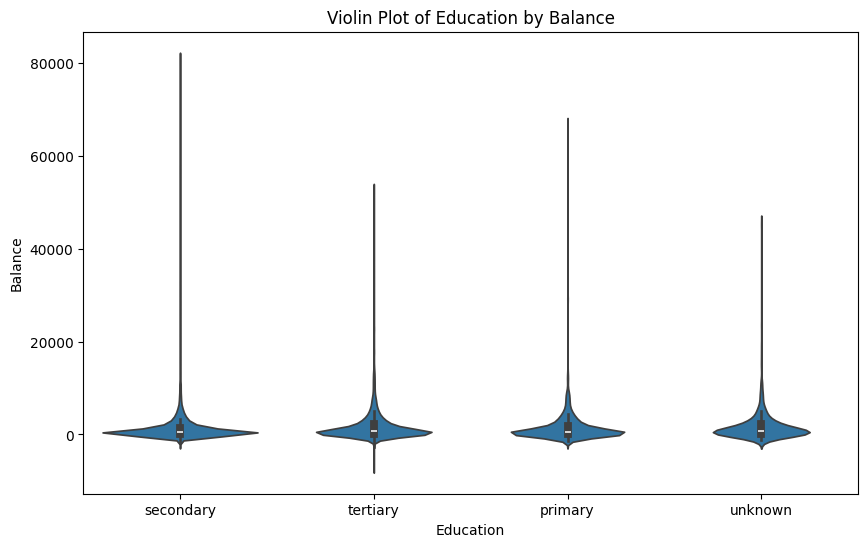

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='gender', y='balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.title('Violin Plot of Education by Balance')
plt.show()

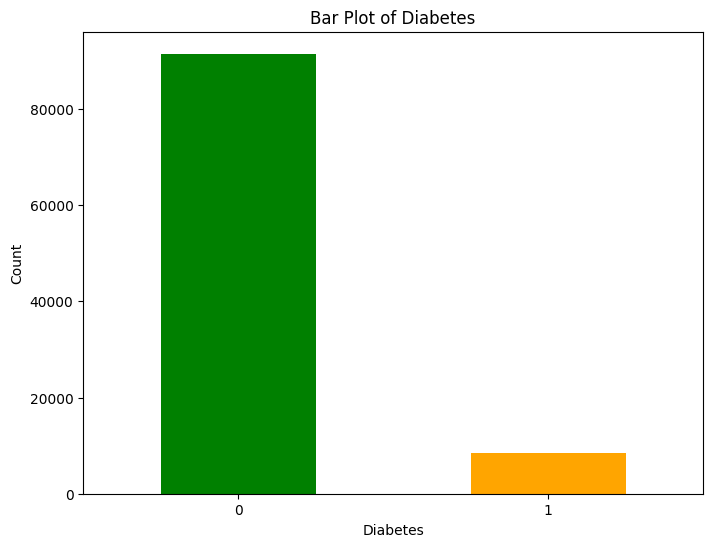

In [ ]:
plt.figure(figsize=(8, 6))
df['diabetes'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Bar Plot of Diabetes')
plt.xticks(rotation=0)
plt.show()

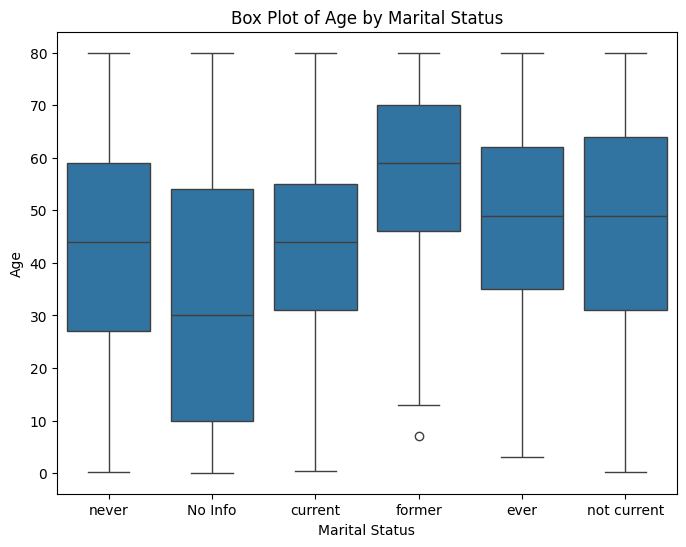

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoking_history', y='age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Marital Status')
plt.show()

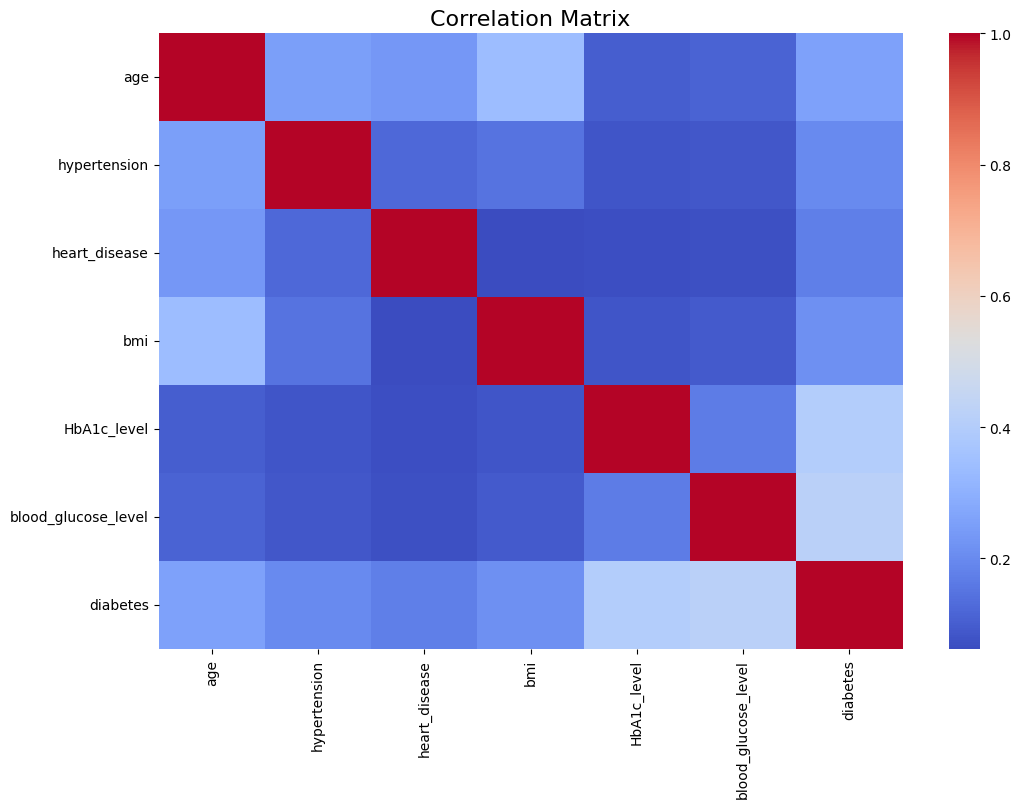

In [ ]:
df2=df.copy()
fig = plt.figure(figsize=(12,8))
df2['diabetes'] = LabelEncoder().fit_transform(df2['diabetes'])



numeric_df = df2.select_dtypes(exclude="object")

corr= numeric_df.corr()


sns.heatmap(corr, cbar=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# prepare data for modeling

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Separate categorical and numerical columns

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [ ]:
df[numerical_columns].head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [ ]:
df[categorical_columns].head(5)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


## convert categorical columns to numerical

Apply label encoding to categorical columns

In [ ]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Apply scaling to numerical columns

In [ ]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,-0.284439,4.936379,4,-0.321056,1.001706,0.047704,-0.304789
1,0,0.538006,-0.284439,-0.202578,0,-0.000116,1.001706,-1.426210,-0.304789
2,1,-0.616691,-0.284439,-0.202578,4,-0.000116,0.161108,0.489878,-0.304789
3,0,-0.261399,-0.284439,-0.202578,1,-0.583232,-0.492690,0.416183,-0.304789
4,1,1.515058,3.515687,4.936379,1,-1.081970,-0.679490,0.416183,-0.304789


# Data spliting

Split features (data) and target variable

In [ ]:
X = df.drop(columns=['deposit'])
y = df['deposit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (8929, 16)
train target   shape:  (8929,)
__________

test  features shape:  (2233, 16)
test  target   shape:  (2233,)


# Modeling

## LinearRegression

### training

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

### Evaluation

In [ ]:
y_pred=LR.predict(X_test)
y_pred

array([0.47578849, 0.89877642, 0.64161814, ..., 0.41903778, 0.9028321 ,
       0.49171316])

In [ ]:
y_test

,deposit
5527,0
4541,1
1964,1
5007,1
8928,0
...,...
376,1
5544,0
10749,0
3881,1


In [ ]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.77      0.83      0.80      1166
     deposit       0.80      0.73      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [ ]:
LR.coef_

array([ 0.01005144,  0.00127897,  0.02464056,  0.0363305 , -0.0497507 ,
        0.01635566, -0.17108601, -0.11078905, -0.10842142, -0.0117625 ,
        0.0085283 ,  0.22947051, -0.03703521,  0.06142579,  0.04159872,
        0.02854728])

In [ ]:
LR.intercept_

np.float64(0.42356194877916586)

save the results

In [ ]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

### Confusion matrix

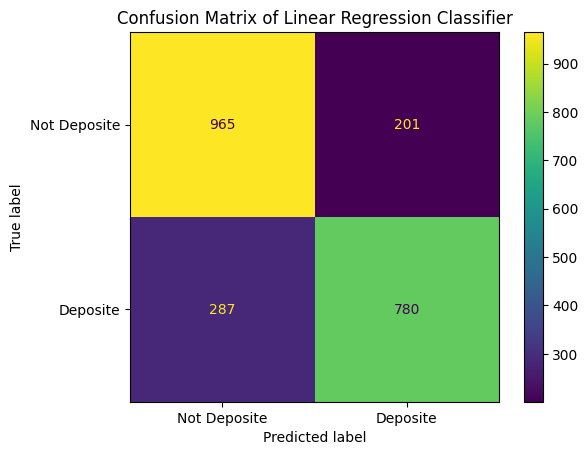

In [ ]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Linear Regression Classifier")
plt.show()

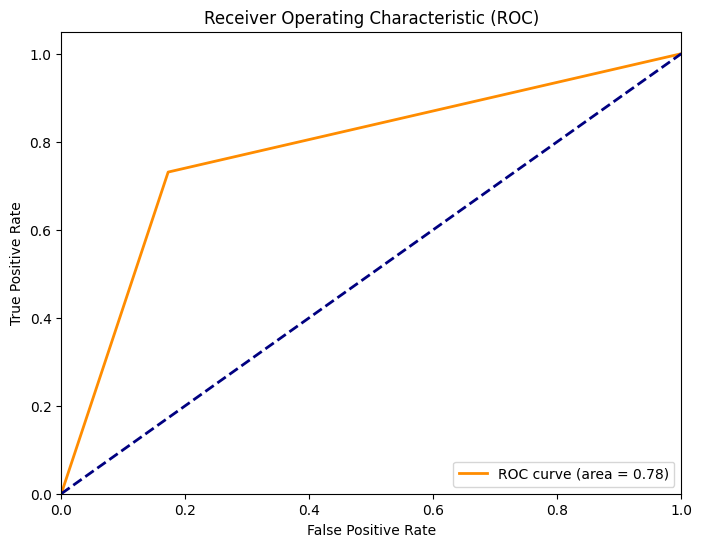

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_result = ['Linear Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.78146,0.795107,0.731022,0.761719,0.779319


## Random forest classifier

### model training

In [ ]:
RF=RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Evaluation

In [ ]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.83      0.83      0.83      1166
     deposit       0.81      0.81      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



### the Confusion matrix

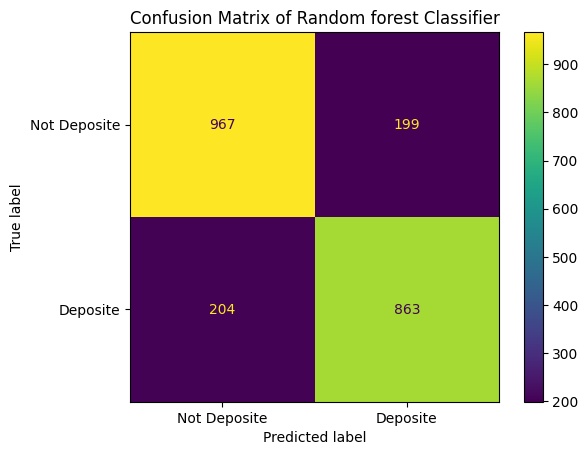

In [ ]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Random forest Classifier")
plt.show()

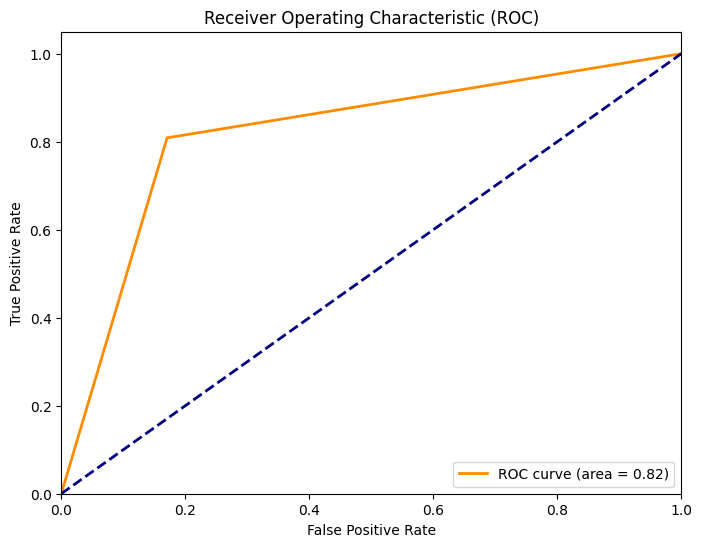

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### save reults

In [ ]:
model_result = ['Random Forest',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.819525,0.812618,0.808810,0.810709,0.819070


## Logistic Regression

### model training

In [ ]:
Logistic_regression = LogisticRegression(penalty='l2', dual=False, C=0.9, fit_intercept=True
                        , random_state = 41, max_iter=1000)
Logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.9, max_iter=1000, random_state=41)

### model evaluation

In [ ]:
y_pred=Logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.79      0.82      0.80      1166
     deposit       0.79      0.76      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



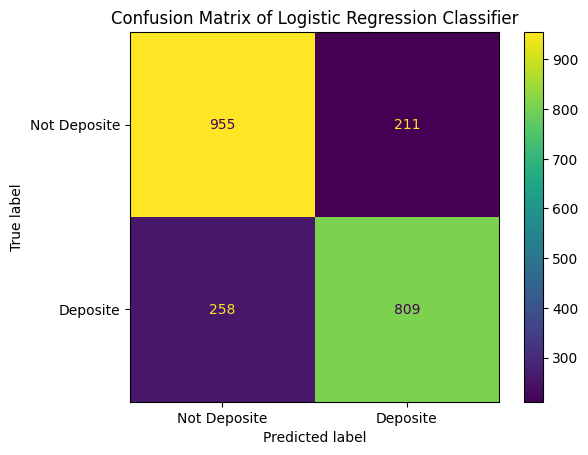

In [ ]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

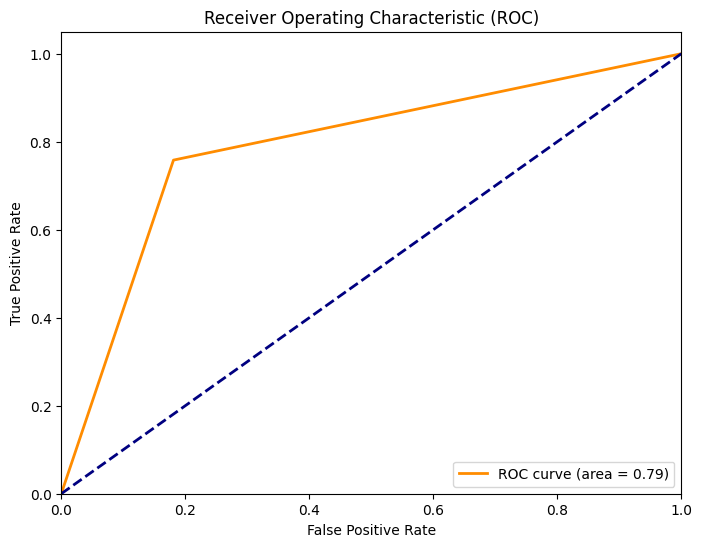

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

save results

In [ ]:
model_result = ['Logistic Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.819525,0.812618,0.808810,0.810709,0.819070
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620


## Linear Support-Vector Classifier

### mosel training

In [ ]:
LSVC = LinearSVC(penalty='l2',dual=False, C=.9)
LSVC.fit(X_train,y_train)

LinearSVC(C=0.9, dual=False)

### Model Evaluation

In [ ]:
y_pred=LSVC.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.78      0.82      0.80      1166
     deposit       0.79      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.79      0.79      2233



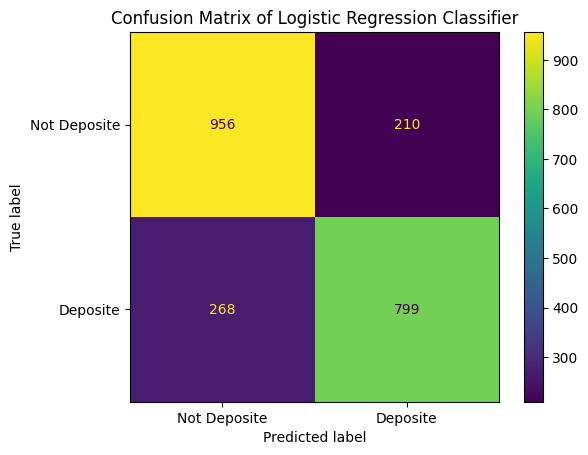

In [ ]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

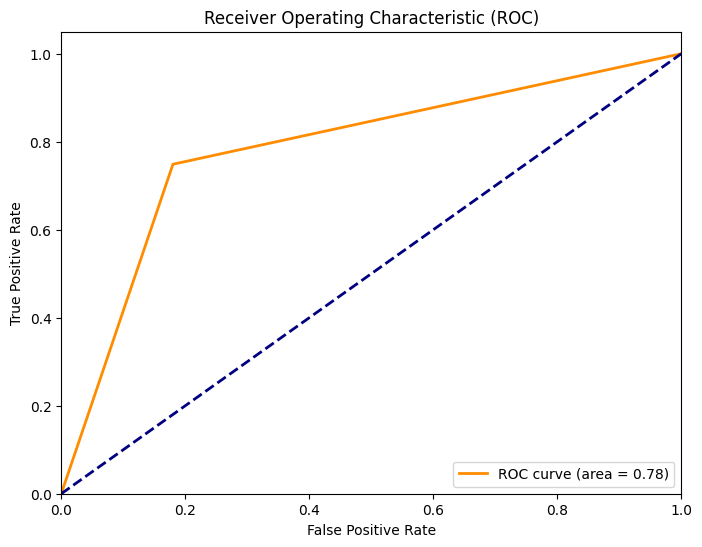

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_result = ['Linear SVC',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.819525,0.812618,0.808810,0.810709,0.819070
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363


## CNN

### convert data to images
cnn mainly work with images, so we convert our numerical data image shape

In [ ]:
#Normalize Data
X_normalized = (df - df.min()) / (df.max() - df.min())

X_array = X_normalized.values

N_samples, N_features = X_array.shape
height = 1
width = N_features
channels = 1
X_reshaped = X_array.reshape(N_samples, height, width, channels)


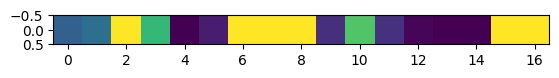

In [ ]:
img=X_reshaped[5]
plt.imshow(img)
plt.show()

### split data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('valid  features shape: ',X_valid.shape)
print('valid  target   shape: ',y_valid.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (7589, 1, 17, 1)
train target   shape:  (7589,)
__________

valid  features shape:  (1340, 1, 17, 1)
valid  target   shape:  (1340,)
__________

test  features shape:  (2233, 1, 17, 1)
test  target   shape:  (2233,)


In [ ]:
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(height, width, channels), padding='same'),
    MaxPooling2D((1, 2)),
    Flatten(),
    Dense(6, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 17, 2)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 8, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5194 - loss: 0.6912 - val_accuracy: 0.5493 - val_loss: 0.6800
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6006 - loss: 0.6695 - val_accuracy: 0.6470 - val_loss: 0.6387
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6308 - loss: 0.6327 - val_accuracy: 0.6701 - val_loss: 0.6119
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6688 - loss: 0.5968 - val_accuracy: 0.7440 - val_loss: 0.5436
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7356 - loss: 0.5204 - val_accuracy: 0.8231 - val_loss: 0.4079
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8121 - loss: 0.3930 - val_accuracy: 0.9261 - val_loss: 0.2648
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.2833 - val_accuracy: 0.9493 - val_loss: 0.1982
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8983 - loss: 0.2331 - val_accuracy: 0

### Evaluate Model

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9696 - loss: 0.1325
Test Accuracy: 0.9650694131851196


In [ ]:
y_pred=model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
(2233, 1)


array([[0.33843684],
       [0.9882988 ],
       [0.6276607 ],
       [0.98576236],
       [0.00677531]], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.96      0.97      0.97      1166
     deposit       0.97      0.96      0.96      1067

    accuracy                           0.97      2233
   macro avg       0.97      0.96      0.96      2233
weighted avg       0.97      0.97      0.97      2233



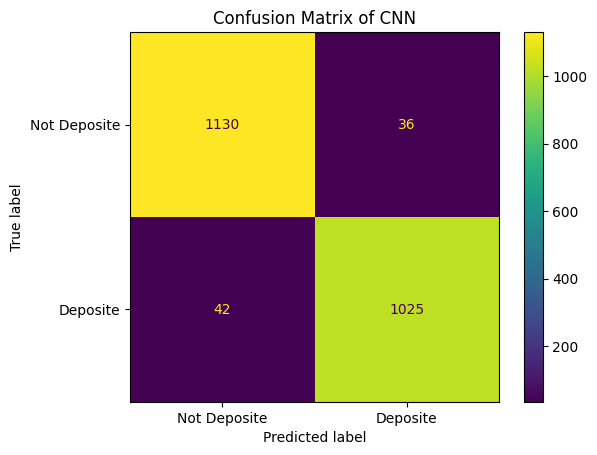

In [ ]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of CNN")
plt.show()

##

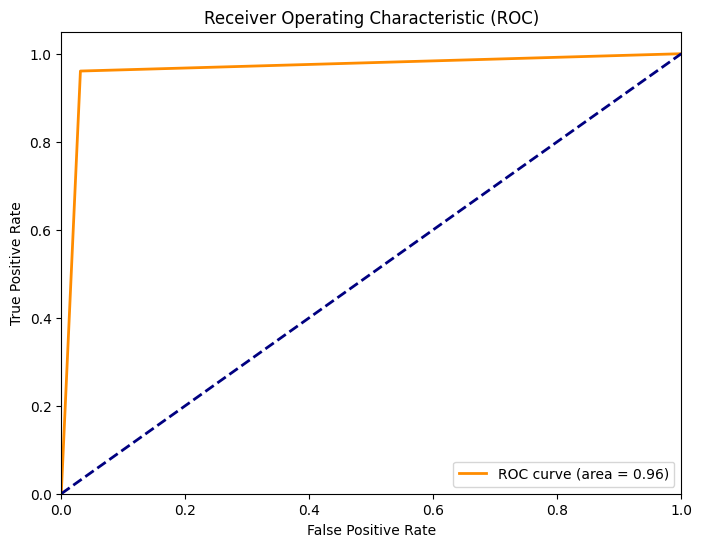

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_result = ['CNN',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results = results.drop(results[results['Model Name'] == 'CNN'].index, errors='ignore')
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.819525,0.812618,0.808810,0.810709,0.819070
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,0.965069,0.966070,0.960637,0.963346,0.964881


In [ ]:
model.save('cnn_model.keras')

# Evaluation and comaprison

In [ ]:
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.819525,0.812618,0.808810,0.810709,0.819070
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,0.965069,0.966070,0.960637,0.963346,0.964881


### Accuracy Comparison

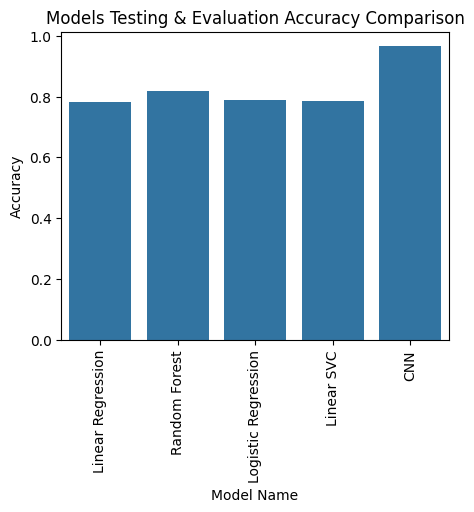

In [ ]:
import seaborn as sns
plt.subplots(figsize=(5,4))
sns.barplot(x="Model Name", y="Accuracy",data=results)
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained CNN model
loaded_model = load_model('cnn_model.keras')

# Assuming 'new_data_df' is your new data in a pandas DataFrame with the same columns as the training data
# Replace this with your actual new data
# For demonstration, I'll use the first 5 rows of the original dataframe as new data
new_data_df = pd.read_csv('new_data_df.csv')

# Separate categorical and numerical columns (using the original column names before encoding)
# You might need to adjust these if your new data source names are different
categorical_columns_new = new_data_df.select_dtypes(include=['object']).columns
numerical_columns_new = new_data_df.select_dtypes(exclude=['object']).columns


# Apply the same preprocessing steps as the training data
# Label encode categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column in new_data_df.columns:
        new_data_df[column] = label_encoder.fit_transform(new_data_df[column])


# Scale numerical columns using the same scaler fitted on the training data
# You need to make sure you have the original scaler object or fit a new one on the new data
# For this example, I'll assume the scaler object from previous steps is available.
# If not, you would need to load or re-create it based on the training data.
scaler = StandardScaler() # This should be the scaler fitted on the training data
new_data_df[numerical_columns] = scaler.fit_transform(new_data_df[numerical_columns])

# Reshape the new data to match the CNN input shape
new_data_array = new_data_df.values
N_samples_new, N_features_new = new_data_array.shape
height_new = 1
width_new = N_features_new
channels_new = 1
new_data_reshaped = new_data_array.reshape(N_samples_new, height_new, width_new, channels_new)

# Make predictions
predictions = loaded_model.predict(new_data_reshaped)

# Convert predictions to binary output (0 or 1) using the same threshold
threshold = 0.5
predicted_classes = np.where(predictions >= threshold, 1, 0)

# Print the predictions
print("Predictions for new data:")
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predictions for new data:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
